In [1]:
# !pip install statsmodels
# !pip install plotnine

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import warnings
from plotnine import *
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/workspaces/IDS701_Final_Project_Du/00_Source_Date/IDS701_final_data.csv')
# takes about 45s

In [3]:
# drop the first two columns
df = df.drop(df.columns[[0, 1]], axis=1)

In [4]:
df.columns

Index(['ENTITY_CD', 'YEAR', 'Subject_x', 'ASSESSMENT_NAME', 'ENTITY_NAME',
       'SUBGROUP_NAME', 'NOT_TESTED', 'NUM_TESTED', 'NUM_PROF', 'PER_PROF',
       'TOTAL_SCALE_SCORES', 'MEAN_SCORE', 'TOTAL_COUNT', 'PCT_NOT_TESTED',
       'PCT_TESTED', 'ES_ELA', 'ES_MATH', 'ES_SCI', 'ES', 'MS_ELA', 'MS_MATH',
       'MS_SCI', 'MS', 'EM', 'ST_NOTSURE', 'Female_MEAN_SCORE',
       'Female_NOT_TESTED', 'Female_NUM_PROF', 'Female_NUM_TESTED',
       'Female_PER_PROF', 'Female_TOTAL_SCALE_SCORES', 'Male_MEAN_SCORE',
       'Male_NOT_TESTED', 'Male_NUM_PROF', 'Male_NUM_TESTED', 'Male_PER_PROF',
       'Male_TOTAL_SCALE_SCORES', 'Female_PCT_NOT_TESTED', 'Female_PCT_TESTED',
       'Female_TOTAL_COUNT', 'Male_PCT_NOT_TESTED', 'Male_PCT_TESTED',
       'Male_TOTAL_COUNT', 'Subject_y', 'NUM_TESTED_white', 'NUM_PROF_white',
       'TOTAL_SCALE_SCORES_white', 'MEAN_SCORE_white', 'NUM_TESTED_non_white',
       'NUM_PROF_non_white', 'TOTAL_SCALE_SCORES_non_white',
       'MEAN_SCORE_non_white', 'Subject'

In [5]:

model = smf.ols("MEAN_SCORE ~ YEAR + ENTITY_CD", df).fit().summary()

In [6]:
model

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             MEAN_SCORE   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                 1.330e+04
Date:                Sun, 23 Apr 2023   Prob (F-statistic):               0.00
Time:                        09:55:14   Log-Likelihood:            -6.3420e+07
No. Observations:             9488161   AIC:                         1.268e+08
Df Residuals:                 9488158   BIC:                         1.268e+08
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.199e+04     80.756   -148.480      0.000   -1.21e+04   -1.18e+04
YEAR           6.1880      0.040    154.784      0.000       6.110       6.266
ENTITY_CD   1.363e-06   2.34e-08     58.189      0.000    1.32e-06    1.41e-06
==============================================================================
Omnibus:                  2787109.415   Durbin-Watson:                   0.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          5988655.423
Skew:                          -1.824   Prob(JB):                         0.00
Kurtosis:                       4.359   Cond. No.                     4.47e+09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.47e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [7]:
pred = df.columns[df.columns.str.contains('MEAN')]
print(pred)

Index(['MEAN_SCORE', 'Female_MEAN_SCORE', 'Male_MEAN_SCORE',
       'MEAN_SCORE_white', 'MEAN_SCORE_non_white',
       'MEAN_SCORE_english_language_learners',
       'MEAN_SCORE_non-english_language_learners'],
      dtype='object')


In [8]:
# df.shape

In [9]:
# df['MEAN_SCORE_white'].value_counts()

In [10]:
# # encode like this: df.loc[df[white mean scores] > 0, white_or_not] = 1, else 0 (edited) 
# df['white_or_not'] = df['MEAN_SCORE_white'].apply(lambda x: 1 if x > 0 else 0)
# df['female_or_not'] = df['Female_MEAN_SCORE'].apply(lambda x: 1 if x > 0 else 0)

In [11]:
# for i in pred:
#     print(i)
#     model = smf.ols(f"{i} ~ YEAR", df).fit().summary()
#     print(model)

In [12]:
df['YEAR'].unique()

array([2018, 2019, 2021, 2022])

In [13]:
df['treatment'] = df['YEAR'].apply(lambda x: "Treated" if x > 2020 else "Control")
df["years_from_policy_change"] = df["YEAR"] - 2019

In [14]:
# keep the columns: YEAR, treatment, and years_from_policy_change, and any columns that contain MEAN in its string
df = df[['YEAR', 'treatment', 'years_from_policy_change'] + list(df.columns[df.columns.str.contains('MEAN')])]
df.head()

,YEAR,treatment,years_from_policy_change,MEAN_SCORE,Female_MEAN_SCORE,Male_MEAN_SCORE,MEAN_SCORE_white,MEAN_SCORE_non_white,MEAN_SCORE_english_language_learners,MEAN_SCORE_non-english_language_learners
0,2018,Control,-1,601.0,604.0,598.0,610.0,602.6,580.0,604.0
1,2018,Control,-1,601.0,604.0,598.0,610.0,602.6,580.0,604.0
2,2018,Control,-1,601.0,604.0,598.0,610.0,602.6,580.0,604.0
3,2018,Control,-1,601.0,604.0,598.0,610.0,602.6,580.0,604.0
4,2018,Control,-1,601.0,604.0,598.0,610.0,602.6,580.0,604.0


In [16]:
# df.to_csv("shortened_data.csv")

In [15]:
# pre_covid = df[df['YEAR'] < 2020]
# post_covid = df[df['YEAR'] >= 2020]

In [16]:
# # pred: list of column names
# # Create a new variable for years from policy change
# df["years_from_policy_change"] = df["YEAR"] - 2019

# # Create the difference-in-differences plot
# g = (
#     ggplot(
#         df,
#         aes(x="years_from_policy_change", y="MEAN_SCORE", color="treatment"),
#     )
#     + geom_smooth(
#         method="lm", data=df[(df["years_from_policy_change"] < 0) & (df["treatment"] == "Treated")]
#     )
#     + geom_smooth(
#         method="lm", data=df[(df["years_from_policy_change"] < 0) & (df["treatment"] == "Control")]
#     )
#     + geom_smooth(
#         method="lm", data=df[(df["years_from_policy_change"] >= 0) & (df["treatment"] == "Treated")]
#     )
#     + geom_smooth(
#         method="lm", data=df[(df["years_from_policy_change"] >= 0) & (df["treatment"] == "Control")]
#     )
#     + geom_vline(xintercept=0, linetype="dashed")
#     + geom_text(x=1, y=7, label="Post-Policy Change", color="black")
#     + labs(
#         title="Diff-in-Diff Model Graph for Violent Crime Rate"
#     )
#     + xlab("Years from Policy Change")
#     + ylab("Violent Crime Rate (per 100,000 people)")
#     + theme(legend_position="right")
# )
# g

In [15]:
# randomly select 10000 rows from the dataframe
df_new =  df.sample(n=100000, random_state=42)

In [16]:
df_new['YEAR'].unique()

array([2022, 2018, 2019, 2021])

In [17]:
# do a stratified sampling on YEAR
df_new = df.groupby('YEAR', group_keys=False).apply(lambda x: x.sample(min(len(x), 500)))

In [18]:
df_new['YEAR'].unique()

array([2018, 2019, 2021, 2022])

In [19]:
df_new['treatment'].unique()

array(['Control', 'Treated'], dtype=object)

In [20]:
df_new["years_from_policy_change"].unique()

array([-1,  0,  2,  3])

In [27]:
df_new.groupby(['YEAR', 'treatment'])['MEAN_SCORE'].mean().unstack()

treatment,Control,Treated
YEAR,,
2018,482.005177,NaN
2019,494.184743,NaN
2021,NaN,527.852
2022,NaN,514.492


In [24]:
# plot the df_new into a line graph to see if there is a trend before and after 2020 on both treated and control groups using plt
df_new.groupby(['YEAR', 'treatment'])['MEAN_SCORE'].mean().unstack().plot()

<Axes: xlabel='YEAR'>

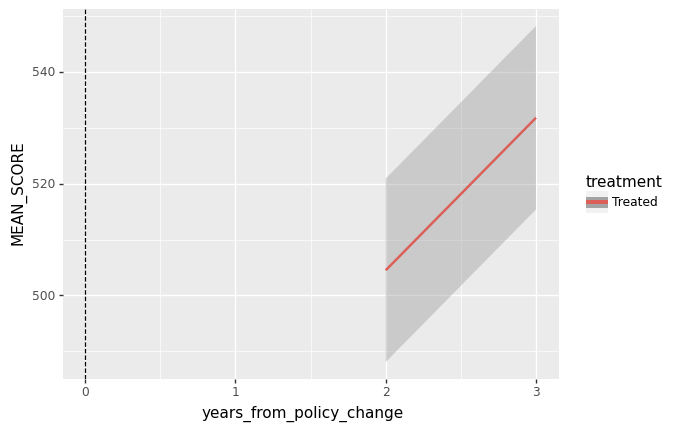

<ggplot: (8749362216570)>

In [21]:
# plot the graph
g = (
    ggplot(
        
        df_new,
        aes(x="years_from_policy_change", y="MEAN_SCORE", color="treatment"),
    )
    + geom_smooth(
        method="lm", data=df_new[(df_new["years_from_policy_change"] < 0) & (df_new["treatment"] == "Treated")]
    )
    + geom_smooth(
        method="lm", data=df_new[(df_new["years_from_policy_change"] < 0) & (df_new["treatment"] == "Control")])

    + geom_smooth(
        method="lm", data=df_new[(df_new["years_from_policy_change"] >= 0) & (df_new["treatment"] == "Treated")])  
    + geom_smooth(
        method="lm", data=df_new[(df_new["years_from_policy_change"] >= 0) & (df_new["treatment"] == "Control")])
    + geom_vline(xintercept=0, linetype="dashed")
)
g

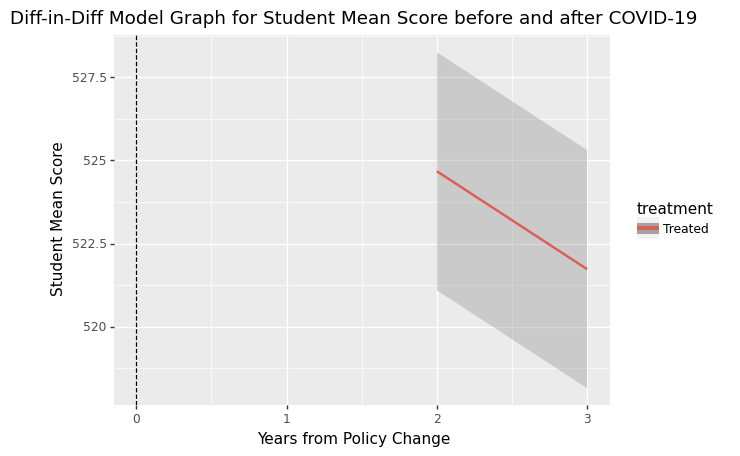

<ggplot: (8751266625143)>

In [32]:
g = (
    ggplot(
        df_new,
        aes(x="years_from_policy_change", y="MEAN_SCORE", color="treatment"),
    )
    + geom_smooth(
        method="lm", data=df_new[(df_new["years_from_policy_change"] < 0) & (df_new["treatment"] == "Treated")]
    )
    + geom_smooth(
        method="lm", data=df_new[(df_new["years_from_policy_change"] < 0) & (df_new["treatment"] == "Control")]
    )
    + geom_smooth(
        method="lm", data=df_new[(df_new["years_from_policy_change"] >= 0) & (df_new["treatment"] == "Treated")]
    )
    + geom_smooth(
        method="lm", data=df_new[(df_new["years_from_policy_change"] >= 0) & (df_new["treatment"] == "Control")]
    )
    + geom_vline(xintercept=0, linetype="dashed")
    + geom_text(x=1, y=7, label="Post-Policy Change", color="black")
    + labs(
        title="Diff-in-Diff Model Graph for Student Mean Score before and after COVID-19"
    )
    + xlab("Years from Policy Change")
    + ylab("Student Mean Score")
    + theme(legend_position="right")
)
g
# takes about 1min20s for 10k samples

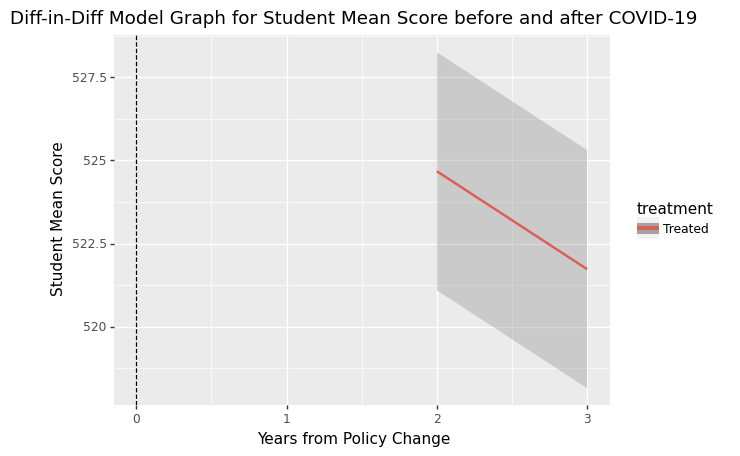

In [33]:
print(g)

In [18]:
# g = (
#     ggplot(
#         df,
#         aes(x="years_from_policy_change", y="MEAN_SCORE", color="treatment"),
#     )
#     + geom_smooth(
#         method="lm", data=df[(df["years_from_policy_change"] < 0) & (df["treatment"] == "Treated")]
#     )
#     + geom_smooth(
#         method="lm", data=df[(df["years_from_policy_change"] < 0) & (df["treatment"] == "Control")]
#     )
#     + geom_smooth(
#         method="lm", data=df[(df["years_from_policy_change"] >= 0) & (df["treatment"] == "Treated")]
#     )
#     + geom_smooth(
#         method="lm", data=df[(df["years_from_policy_change"] >= 0) & (df["treatment"] == "Control")]
#     )
#     + geom_vline(xintercept=0, linetype="dashed")
#     + geom_text(x=1, y=7, label="Post-Policy Change", color="black")
#     + labs(
#         title="Diff-in-Diff Model Graph for Student Mean Score before and after COVID-19"
#     )
#     + xlab("Years from Policy Change")
#     + ylab("Student Mean Score")
#     + theme(legend_position="right")
# )
# g

In [19]:
# make a difference-in-difference model plot
def diff_in_diff_plot(df, pred, group):
    """
    df: dataframe
    pred: list of column names
    group: column name
    """
    for i in pred:
        print(i)
        model = smf.ols(f"{i} ~ YEAR + {group} + YEAR:{group}", df).fit().summary()
        print(model)
        sns.lmplot(x='YEAR', y=i, hue=group, data=df)
        plt.show()